# Visualize the scraped housing data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import importlib
importlib.reload(plotting_functions)

In [74]:
#pd.set_option(max_collumns, None)

In [75]:
df = pd.read_csv('../property_data.csv')

In [76]:
df.columns

Index(['property_id', 'date_obtained', 'price', 'property_type',
       'livable_area', 'heating_type', 'has_photovoltaic_panels',
       'has_double_glazing', 'number_of_rooms', 'number_of_bathrooms',
       'number_of_bedrooms', 'number_of_toilets', 'has_living_room',
       'has_dining_room', 'has_attic', 'has_basement', 'has_terrace',
       'terrace_surface', 'has_garden', 'garden_surface', 'energy_label',
       'primary_energy_consumption', 'postal_code', 'latitude', 'longitude',
       'year_built', 'building_condition', 'floor_number', 'total_floors',
       'property_size', 'flood_zone_type', 'cadastral_income'],
      dtype='object')

In [82]:
df['postal_code'] = df['postal_code'].astype(str)

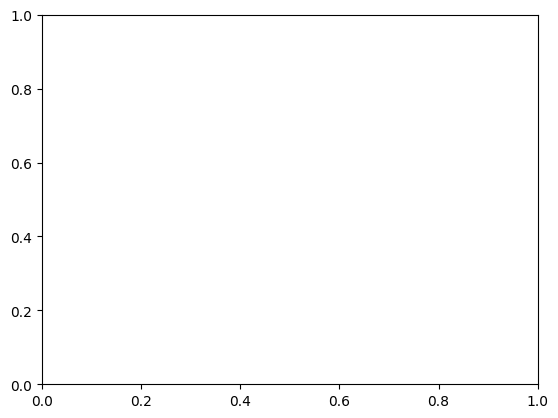

In [77]:
hist_fig = px.histogram(df, x='price', nbins=50, title='Distribution of Property Prices', color='property_type', barmode='stack')

# Initialize the KDE figure
kde_fig = go.Figure()

# Add a KDE line for each property type, and compute statistics
for property_type in df['property_type'].unique():
    subset = df[df['property_type'] == property_type]
    
    # Calculate the KDE using seaborn
    sns_kde = sns.kdeplot(subset['price'], bw_adjust=1, fill=False)
    kde_x, kde_y = sns_kde.get_lines()[0].get_data()
    sns_kde.clear()
    
    # Add the KDE line to the figure
    kde_fig.add_trace(go.Scatter(
        x=kde_x,
        y=kde_y,
        mode='lines',
        name=f'{property_type} KDE'
    ))
    
    # Calculate statistics
    mean = subset['price'].mean()
    median = subset['price'].median()
    stdev = subset['price'].std()
    
    # Add annotations for mean, median, and stdev
    kde_fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, max(kde_y)],
        mode='lines',
        line=dict(dash='dash'),
        name=f'{property_type} Mean'
    ))
    kde_fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, max(kde_y)],
        mode='lines',
        line=dict(dash='dot'),
        name=f'{property_type} Median'
    ))
    kde_fig.add_trace(go.Scatter(
        x=[mean - stdev, mean + stdev],
        y=[0, 0],
        mode='lines',
        line=dict(dash='dash'),
        name=f'{property_type} Std Dev'
    ))

# Update layout for the KDE figure
kde_fig.update_layout(
    title='Kernel Density Estimate of Property Prices with Statistics',
    xaxis_title='Price',
    yaxis_title='Density'
)

# Show the plots
hist_fig.show()
kde_fig.show()

In [78]:


energy_label_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Create the box plot
fig = px.box(df, x='energy_label', y='price', color='property_type', title='Box Plot of House Prices by Energy Label and Property Type',
             category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [108]:
import importlib
importlib.reload(plotting_functions)
import plotting_functions

plotting_functions.generate_boxplot(df, x = 'heating_type', y = 'price', color = 'property_type')

In [79]:


energy_label_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Create the box plot
fig = px.box(df, x='heating_type', y='price', color='property_type', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [80]:


energy_label_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Create the box plot
fig = px.box(df, x='has_photovoltaic_panels', y='price', color='property_type', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [103]:
df.head(50)

# Create the box plot
fig = px.box(df, x='postal_code', y='price', color='property_type', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [88]:
# Create the box plot
fig = px.box(df, x='building_condition', y='price', color='property_type', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

<Axes: xlabel='number_of_bedrooms', ylabel='price'>

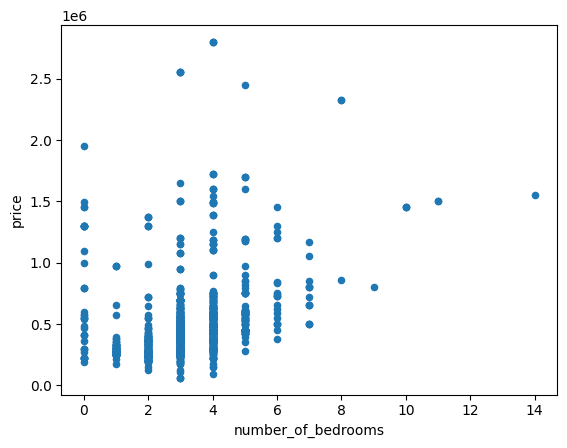

In [102]:
df_subset = df.query('property_size < 20000')
df_subset.plot(kind = 'scatter', x = 'number_of_bedrooms', y = 'price')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 2280 non-null   int64  
 1   date_obtained               2280 non-null   int64  
 2   price                       2280 non-null   int64  
 3   property_type               2280 non-null   object 
 4   livable_area                2084 non-null   float64
 5   heating_type                1260 non-null   object 
 6   has_photovoltaic_panels     1294 non-null   object 
 7   has_double_glazing          1772 non-null   object 
 8   number_of_rooms             1259 non-null   float64
 9   number_of_bathrooms         2024 non-null   float64
 10  number_of_bedrooms          2280 non-null   int64  
 11  number_of_toilets           1718 non-null   float64
 12  has_living_room             2280 non-null   bool   
 13  has_dining_room             199 n

<Axes: >

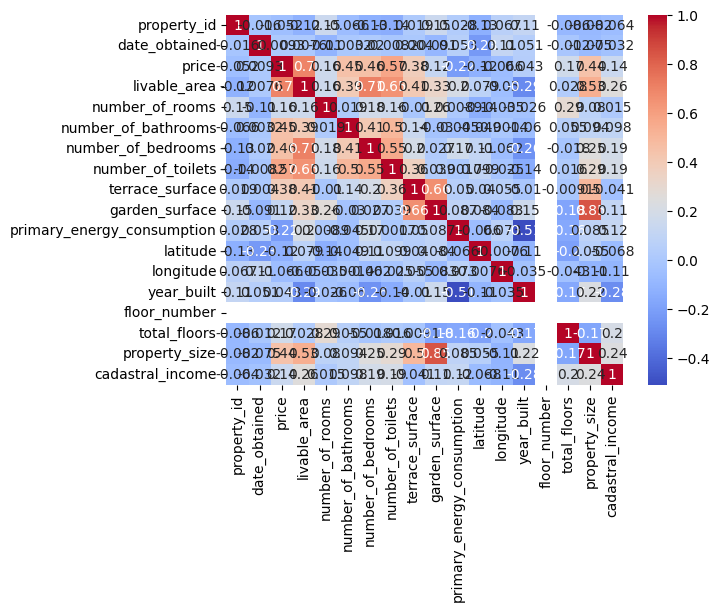

In [136]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
sns.heatmap(df[numeric_cols].corr('spearman'), annot=True, cmap='coolwarm')

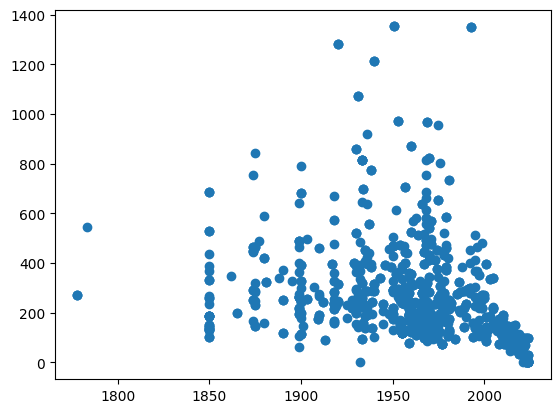

In [137]:
plt.scatter(df.year_built, df.primary_energy_consumption)

In [132]:
df[numeric_cols]

,property_id,date_obtained,price,livable_area,number_of_rooms,number_of_bathrooms,number_of_bedrooms,number_of_toilets,terrace_surface,garden_surface,primary_energy_consumption,latitude,longitude,year_built,floor_number,total_floors,property_size,cadastral_income
0,11326221,19052024,279000,94.0,9.0,1.0,2,NaN,NaN,NaN,178.0,51.073625,3.747233,1965.0,NaN,NaN,NaN,686
1,11386911,19052024,1090000,NaN,11.0,2.0,0,2.0,NaN,450.0,NaN,51.025043,3.748909,NaN,NaN,NaN,1387.0,0
2,11376909,19052024,269000,99.0,12.0,1.0,2,2.0,NaN,NaN,141.0,51.038280,3.747692,1960.0,NaN,NaN,NaN,0
3,11362707,19052024,563000,187.0,1.0,1.0,4,1.0,NaN,NaN,172.0,51.026915,3.707021,1954.0,NaN,NaN,230.0,937
4,11361176,19052024,995000,NaN,NaN,NaN,0,NaN,12.0,50.0,NaN,51.053580,3.714567,NaN,NaN,3.0,130.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,11340880,19052024,399000,138.0,10.0,1.0,2,NaN,NaN,NaN,178.0,51.061434,3.751625,2009.0,NaN,NaN,NaN,0
2276,11374289,18052024,299000,263.0,10.0,1.0,4,NaN,NaN,NaN,279.0,51.090303,3.716713,NaN,NaN,NaN,137.0,451
2277,11374289,16052024,299000,263.0,10.0,1.0,4,NaN,NaN,NaN,279.0,51.090303,3.716713,NaN,NaN,NaN,137.0,451
2278,11374289,19052024,299000,263.0,10.0,1.0,4,NaN,NaN,NaN,279.0,51.090303,3.716713,NaN,NaN,NaN,137.0,451
